# Exclusive Feature Bundling 
The Exclusive Feature Bundling (EFB) method is a technique for consolidating features while maintaining their individual distribution. 
According to Ke/Guolin et al. (2017, p.5), the concept is about leveraging the density of the feature space to reduce the number of features. A considerable number of features is not null. Two exclusive features can be merged to form a single exclusive feature bundle.
The feature bundles are capable of constructing the same histograms as the original features. The complexity of histogram construction is reduced from $O(instances * Features)$ to $O(Instances * Bundels)$. Consequently, training can be accelerated without compromising accuracy. 

Two significant challenges must be addressed: the initial identification of bundles and the subsequent merging of these bundles. This notebook will address greedy bundling and the subsequent merging of exclusive features.

## Greedy Bundling 
A greedy bundling algorithm is employed to identify features for bundling. The merge-exclusive features algorithm is employed for the purpose of merging the aforementioned features into a unified bundle.
The problem of identifying a potential exclusive feature bundle can be formulated as a graph coloring problem, which allows for the computation of an exact solution in polynomial time. A greedy bundling algorithm is employed to minimize the necessity for a lengthy computation time. It should be noted that this algorithm is not exact. However, it is faster. Moreover, it is feasible to permit a minor proportion of discrepancies in order to attain favourable outcomes and markedly enhance the quality of feature bundles. The aforementioned ratio is regulated by the variable $\gamma$, which enables the establishment of an optimal equilibrium between precision and efficiency.

### Explanation of Greedy Bundling
Figure 6 illustrates the Greedy Bundling process through the use of pseudo-code. At this juncture, we undertake a detailed examination of the algorithm, focusing on the constituent steps. 

![image.png](images/figure_5.png) <BR>
Figure 6: Representation of Greedy Bundling

The initial stage of the process is to initialize the algorithm by establishing the desired input values. The input value $F$ represents a feature space, and $K$ represents the maximum conflict count. The conflict count represents the sum of individual conflicts between two features values of an instance. A conflict arises if an instance contains non-zero values for both features The algorithm constructs a feature graph, $G$, using the provided information. §G§ is an undirected graph with weighted edges, as represented by the following formula.
$$G = (V,E)$$
In this context, the variable $V$ represents the vertices or nodes, while the variable $E$ represents the edges. In this particular instance, the weights are indicative of the degree of conflict between the features in question. In abstract terms, the graph can be conceptualized as an adjacency matrix. The features are ordered according to their total number of conflicts. Subsequently, the search for feature bundles is initiated. The algorithm then proceeds to group features with edges that have a lower number of conflicts together, represented by $K$. If no bundle has a smaller conflict count than $K$, a new bundle is created, and the algorithm attempts to incorporate additional features. The final output of the algorithm is a feature bundle.

### Practical Understanding of Greedy Bundling

This implementation is divided into two distinct parts. The initial part involves the implementation of Greedy Bundling, while the subsequent section, entitled "Explanation of Merge Exclusive Features," utilizes the Bundled Features for Merge Exclusive Features (MEF).
In order to facilitate the implementation of the algorithms, packages such as numpy, pandas, and plotly are utilized. For the construction of a graph, the the libary networkx and matplotlib areused. Initially, an illustrative dataset is constructed. Subsequently, the code is implemented. 

In [31]:
# Run helper code in utilities
%run ../utilities.ipynb

To illustrate, a small data set comprising five features and ten instances is employed. 

In [32]:
# Create examplary data set
df = pd.DataFrame(
    data={
        "f0": [1, 0, 1, 0, 2, 3, 0, 1, 1, 2],
        "f1": [1, 0, 2, 0, 1, 3, 0, 2, 0, 3],
        "f2": [0, 1, 0, 2, 0, 0, 3, 3, 1, 0],
        "f3": [0, 1, 0, 3, 0, 0, 0, 4, 0, 0],
        "f4": [1, 1, 2, 1, 3, 1, 2, 3, 0, 2],
    },
    index=[
        "i=1",
        "i=2",
        "i=3",
        "i=4",
        "i=5",
        "i=6",
        "i=7",
        "i=8",
        "i=9",
        "i=10",
    ],
)

The following definition includes an implementation of the concept of "Greedy Bundling". The initial section presents an implementation of a graph-building algorithm. The graph is represented as an adjacency matrix, stored as a DataFrame. The following section presents the implementation of the search algorithm. The algorithm operates under the assumption that a new bundle is required. To this end, it checks the conflict count and, if this is smaller than the maximum conflict, sets *need_new* to False. The algorithm returns two lists: bundles and bundles_conflicts. The bundles_conflict data set includes the conflict count for each bundle. The bundles list comprises a list of features, which serve as the input for the Merge Exclusive Feature algorithm. 

In [33]:
def greedy_bundling(F: pd.DataFrame, K: int) -> tuple[list, list, pd.DataFrame]:
    """A simplified implementation of the greedy bundling algorithm

    Args:
        F (pd.DataFrame): the data greedy bundling is to be performed on 
        K (int): the maximum conflict count

    Returns:
        bundles, bundles_conflict, graph (tuple): the bundles (conflict) the algorithm comes up with
    """
    # Construct graph
    graph = pd.DataFrame(columns=F.columns, index=F.columns)
    for i, j in itertools.combinations(df.columns, 2):
        conflicts = len(F[(F[i] > 0) & (F[j] > 0)])
        graph.loc[i, j] = conflicts
        graph.loc[j, i] = (conflicts)  # Is executed twice as the matrix is symmetrical
    
    # Define order of total feature conflicts
    search_order = graph.sum().sort_values(ascending=False).index

    bundles = []
    bundles_conflict = []
    
    # Search for bundles in graph
    for i in search_order:
        need_new = True

        for j in range(1, len(bundles)):
            cnt = int(graph.loc[i, bundles[j]])

            if (cnt + bundles_conflict[j]) <= K:
                bundles[j].append(i)
                bundles_conflict[j] += cnt
                need_new = False
                break

        if need_new == True:
            bundles.append([i])
            bundles_conflict.append(0)

    return bundles, bundles_conflict, graph

In [34]:
bundles, conflicts, graph = greedy_bundling(F=df, K=1)

C:\Users\Sidney Krause\AppData\Local\Temp\ipykernel_2908\2154267790.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  cnt = int(graph.loc[i, bundles[j]])
C:\Users\Sidney Krause\AppData\Local\Temp\ipykernel_2908\2154267790.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  cnt = int(graph.loc[i, bundles[j]])
C:\Users\Sidney Krause\AppData\Local\Temp\ipykernel_2908\2154267790.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  cnt = int(graph.loc[i, bundles[j]])
C:\Users\Sidney Krause\AppData\Local\Temp\ipykernel_2908\2154267790.py:29: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  cnt = int(graph.loc[i, bundl

This function builds a visualisation based on the crowned graph in the form of an adjacency matrix of the greedy bundling algorithm. This visualisation represents a fully connected weighted undirected graph as shown below. The graph represents the features as the nodes and the conflicts as weigthed edges.  

C:\Users\Sidney Krause\AppData\Local\Temp\ipykernel_2908\414726503.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adj_matrix = graph.fillna(0)


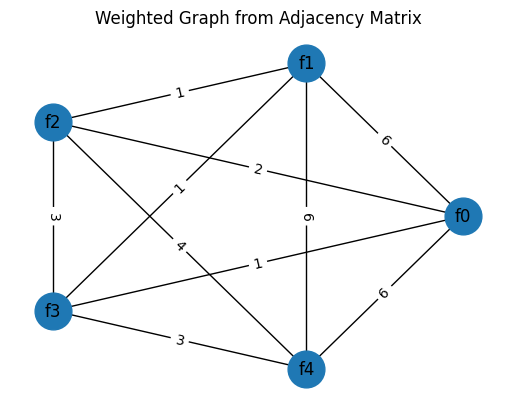

In [35]:
display_graph(graph)

The algorithm has seperated the features into three distinct bundles:

In [36]:
# Show bundles
print(bundles)

[['f4'], ['f0', 'f3'], ['f1', 'f2']]


## Merge Exclusive Features
Once the features have been bundled, the subsequent step is to merge them. In order to achieve this, an algorithmic process known as "Merge Exclusive Features" is employed. This process facilitates the consolidation of features in a manner that enables the original feature to be discernible from the feature bundle. The aforementioned features can be stored in a bin of a histogram without compromising the distribution of the individual features. This can be achieved by simply adding an offset to the original values of the features and merging them. 

![image.png](images/figure_6.png) <BR>
Figure 7: Representation of Merge Exclusive Features 

### Explanation of Merge Exclusive Features
The Merge Exclusive Features algorithm receives a bundle of exclusive features and the quantity of data as inputs. Subsequently, the algorithm sets the $binRanges$ to {0}. In the initial iteration, the algorithm identifies and selects the initial feature. At this juncture, the highest value is sought and appended to the total bin. This value is then added to the bin ranges. Subsequently, the algorithm selects the subsequent features and performs the aforementioned process. The total bin can be conceptualized as a novel feature. Subsequently, the algorithm generates a novel bin, termed $newbin$, following the conclusion of the initial loop. Subsequently, the algorithm executes a calculation within a nested for-loop. The outer loop iterates over the data points, while the inner loop iterates over the features. In the outer loop, the value is set to zero for each instance, and then the inner loop is computed. The inner loop iterates a feature that contains an if-clause with a condition that selects a single value from the set of datapoints of the selected feature that is not equal to zero. If the condition is verified, the algorithm proceeds to select the aforementioned value and incorporate the offset. Subsequently, the algorithm returns the merged features and a list $binRanges$.

### Practical understanding of Merge Exclusive Features


In the case of the previously utilized data, a bundle derived from the Greedy Bundling Algorithm is employed. 

In [37]:
# Select one exemplary bundle
print("Bundle for MEF: ", bundles[1])
bundle = bundles[1]
df[bundles[1]]

Bundle for MEF:  ['f0', 'f3']


,f0,f3
i=1,1,0
i=2,0,1
i=3,1,0
i=4,0,3
i=5,2,0
i=6,3,0
i=7,0,0
i=8,1,4
i=9,1,0
i=10,2,0


The following section presents an implementation of the Merge Exclusive Features algorithm. The implementation is based on the description provided in Figure 7. The algorithm returns two outputs: a DataFrame and a list. The DataFrame represents the merged features, while the list represents the offsets. 

In [38]:
def MEF(num_data: int, feature_bundle: pd.DataFrame) -> tuple[pd.Series, list]:
    """A simplified implementation of the merge exclusive features algorithm

    Args:
        num_data (int): the length of the bundled data set 
        feature_bundle (pd.DataFrame): the data set containing the column bundle to be merged

    Returns:
        new_bin, bin_range (tuple): the merged feature column
    """
    bin_range = [0]  # offset (aligns the individual distributions of features)
    total_bin = 0
    
    # Calculate offsets
    for f in feature_bundle:
        total_bin += feature_bundle[f].max()  # Search for the maximum record
        bin_range.append(total_bin)
    
    # Create empty column for merged feature
    new_bin = pd.Series(data=np.zeros(num_data), index=feature_bundle.index)
    
    # Merge feature columns into one in a row-wise fashion
    for i in range(0, num_data):
        for j in range(0, len(feature_bundle.columns)):
            if feature_bundle.iloc[i, j] != 0:
                new_bin.iloc[i] = feature_bundle.iloc[i, j] + bin_range[j]

    return new_bin, bin_range

In [39]:
# Display merged feature column
merged_df, offset = MEF(num_data=len(df[bundle]), feature_bundle=df[bundle])
print(merged_df, "\n")
print("Offset:", offset)

i=1     1.0
i=2     4.0
i=3     1.0
i=4     6.0
i=5     2.0
i=6     3.0
i=7     0.0
i=8     7.0
i=9     1.0
i=10    2.0
dtype: float64 

Offset: [0, np.int64(3), np.int64(7)]


In [40]:
print("Sparsity of merged data: ", len(merged_df[merged_df == 0]) / len(merged_df))
print(
    "Sparsity of Raw data: ",
    (len(df[df["f0"] == 0]) + len(df[df["f1"] == 0])) / (len(df) * 2),
)

Sparsity of merged data:  0.1
Sparsity of Raw data:  0.35


The merged feature exhibit a higher density than the two preceding features, due to the fact that the MEF algorithm combines the features and subsequently eliminates the zero values. In this instance, the sparsity of the dataset was reduced from 50% to 10%. Furthermore, the MEF algorithm incorporates the properties of the original data set into the merged features. 

[<<<](1.4_gradient_based_one_side_sampling.ipynb)  | 1.5_exclusive_feature_bundling |  [>>>](1.6_conclusion.ipynb)